# Section One: Defining the Question

### a) Specifying The Data Analytic question

> To detect spam emails 

### b) Defining the Metrics of success

> The successful model should have:
* accuracy score equal to or above 80%
* Recall of 80% and above
* Precision of 80% and above
* F1 score of 80% and above
* AUC curve of 75% and above


### c) Understanding the context

Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers.

Often, spam email is sent for commercial purposes. While some people view it as unethical, many businesses still use spam. The cost per email is incredibly low, and businesses can send out mass quantities consistently. Spam email can also be a malicious attempt to gain access to your computer.





### d) Recording the Experimental Design

> 1. Reading the data
> 2. Checking the data
> 3. External Data Source Validation
> 4. Tidying the dataset
> 5. Univariate Analysis
> 6. Bivariate Analysis
> 7. Modelling
> 8. Baseline Model
> 9. Naives Bayes
>10. Optimization of Naive Bayes model
>11. Naive Bayes Model 80-20 train(training 80% of the data)
>12. Naive Bayes Model 70-30 train(training 70% of the data)
>13. Naive Bayes Model 60-40 train(training 60% of the data)
>14. Conclusion
>15. Challenging the model


### e) Data Relevance

The data is relevant since it has important columns.

The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 57 columns are the 57 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells

Below are the features provided in the dataset:
* word_freq_make
* word_freq_address
* word_freq_all
* word_freq_3d
* word_freq_our
* word_freq_over
* word_freq_remove
* word_freq_internet
* word_freq_order
* word_freq_mail
* word_freq_receive
* word_freq_will
* word_freq_people
* word_freq_report
* word_freq_addresses
* word_freq_free
* word_freq_business
* word_freq_email
* word_freq_you
* word_freq_credit
* word_freq_your
* word_freq_font
* word_freq_000
* word_freq_money
* word_freq_hp
* word_freq_hpl
* word_freq_george
* word_freq_650
* word_freq_lab
* word_freq_labs
* word_freq_telnet
* word_freq_857
* word_freq_data
* word_freq_415
* word_freq_85 
* word_freq_technology
* word_freq_1999
* word_freq_parts
* word_freq_pm
* word_freq_direct
* word_freq_cs
* word_freq_meeting 
* word_freq_original
* word_freq_project
* word_freq_re       
* word_freq_edu
* word_freq_table
* word_freq_conference
* char_freq_%3B
* char_freq_%28
* char_freq_%5B
* char_freq_%21
* char_freq_%24
* char_freq_%23
* capital_run_length_average
* capital_run_length_longest
* capital_run_length_total
* class




#Section Two: Reading the data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")
print('the libraries have been imported')

the libraries have been imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading the dataset
spam_df = pd.read_csv('spambase_csv (1).csv')


# Section Three: Checking the data

In [3]:
# Determining the no. of records in our dataset
#
s = spam_df.shape
print('the train dataset has', s[0], 'number of rows, and ', s[1], 'number of columns' )


the train dataset has 4601 number of rows, and  58 number of columns


In [4]:
#previewing the top of the dataset
spam_df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
#Previewing the bottom of the dataset
spam_df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Checking whether each column's info
spam_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
#Checking the columns
spam_df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# Section Four: External Data Source Validation

This dataset is a part of a kaggle competition as shown here:https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv. Kaggle is a trusted and reliable open source for both datasets and competitions
### a) validation


#  Section Five: Tidying the dataset

### Validity

In [8]:
# Dropping columns with over 60 percent null values
print(spam_df.isnull().sum() / spam_df.shape[0] * 100.00)


word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

There are no columns with over 60% null values

### Completeness

In [9]:
#Checking for null values
spam_df.isnull().any()


word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

There are no missing values in our dataset

### Consistency

In [10]:
#Checking for duplicated values
spam_df.duplicated().any()


True

In [11]:
dup_df = spam_df[spam_df.duplicated()]
dup_df.head(20)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.000,5.466,22,82,1
103,0.00,0.00,0.64,0.0,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,2.59,0.0,0.00,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.64,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.000,10.068,131,292,1
104,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.33,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.000,5.500,22,66,1
105,0.00,0.00,0.64,0.0,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,2.59,0.0,0.00,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.64,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.000,10.068,131,292,1
106,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.33,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.000,5.500,22,66,1
108,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.33,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.000,5.500,22,66,1
120,0.05,0.30,0.40,0.0,0.10,0.05,0.00,0.05,0.10,0.00,0.00,0.30,0.20,0.00,0.05,0.00,0.00,0.50,1.55,0.3,0.75,0.0,0.15,0.20,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.05,0.05,0.0,0.0,0.0,0.000,0.045,0.000,0.054,0.118,0.000,2.370,96,588,1
121,0.05,0.30,0.40,0.0,0.10,0.05,0.00,0.05,0.10,0.00,0.00,0.30,0.20,0.00,0.05,0.00,0.00,0.50,1.55,0.3,0.75,0.0,0.15,0.20,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.05,0.05,0.0,0.0,0.0,0.000,0.036,0.000,0.054,0.118,0.000,2.379,96,583,1
136,0.00,0.39,0.39,0.0,0.19,0.00,0.00,0.19,0.00,0.00,0.39,0.39,0.00,0.00,0.00,0.98,0.19,0.39,0.59,0.0,0.78,0.0,0.19,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.19,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.128,0.000,0.160,0.160,0.000,2.128,31,730,1
140,1.00,0.00,0.33,0.0,0.66,0.66,0.00,0.00,0.00,0.00,0.00,0.33,0.66,0.00,0.00,0.66,0.66,0.00,2.33,0.0,0.33,0.0,1.66,0.33,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.060,0.000,0.120,0.541,0.000,5.428,21,304,1


For this dataset, we will drop duplicated entries since it might affect our model prediction

In [12]:
#Dropping duplicated entries from the dataset
# Keeping the first entries and dropping the duplicated entries
s_df = spam_df.drop_duplicates(subset=None, keep='first', inplace=False)
s_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Uniformity


In [13]:
#checking for data types
s_df.dtypes


word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

The variables have the correct data types 

In [14]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in s_df.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(s_df[column].nunique())     #Printing the number of unique values in each column
  print(s_df[column].unique())      # Printing only unique values in each column
  print('\n')  
  

word_freq_make
142
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


word_freq_address
171
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1

### Checking for outliers

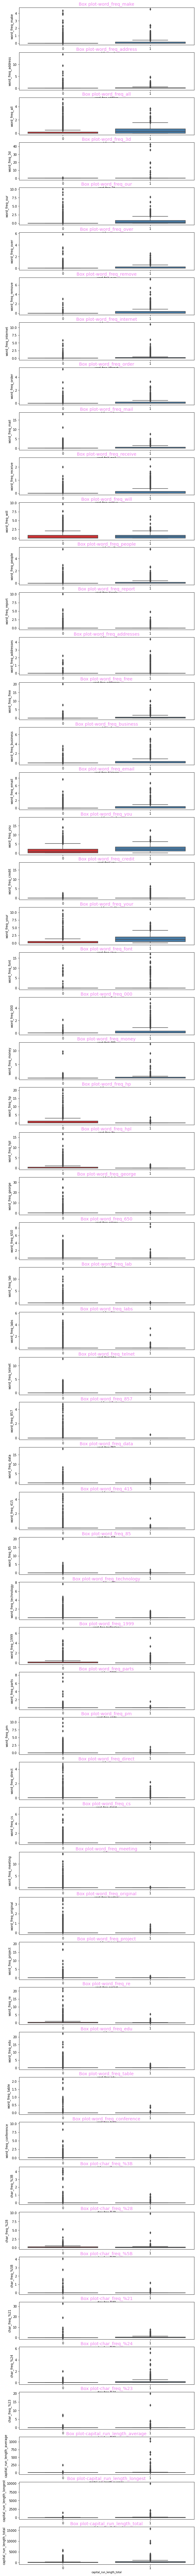

In [15]:
#numerical variables
num_columns = s_df.drop('class', axis = 1).columns
col_names = num_columns

fig, ax = plt.subplots(len(col_names), figsize = (10, 150))

for i, col_val in enumerate(col_names):
  sns.boxplot(x = s_df['class'] ,y= s_df[col_val], ax=ax[i], palette = 'Set1' )
  ax[i].set_title('Box plot-{}'.format(col_val),color = 'violet', fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Presence of outliers will affect the accuracy of our model

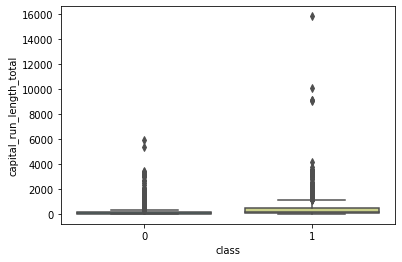

In [16]:
#Checking for outliers in categorical variables
sns.boxplot(x='class',y='capital_run_length_total',data=s_df,palette='rainbow')

In [17]:
#Removing Outliers
for j in s_df.columns:
    try:
        print("colnames ",j)
        xy=x[j]    
        mydata=pd.DataFrame()
        #print(xy)
        updated=[]
        Q1,Q3=np.percentile(xy,[25,75])
        IQR=Q3-Q1
        minimum=Q1-1.5*IQR
        maximum=Q3+1.5*IQR
        for i in xy:
            if(i>maximum):
                print("Entering maxim")
                i=maximum
                updated.append(i)
            elif(i<minimum):
                print("enterinf minimum")
                i=minimum
                updated.append(i)
            else:
                updated.append(i)
        s_df[j]=updated
    except:
        continue
#return s_df



colnames  word_freq_make
colnames  word_freq_address
colnames  word_freq_all
colnames  word_freq_3d
colnames  word_freq_our
colnames  word_freq_over
colnames  word_freq_remove
colnames  word_freq_internet
colnames  word_freq_order
colnames  word_freq_mail
colnames  word_freq_receive
colnames  word_freq_will
colnames  word_freq_people
colnames  word_freq_report
colnames  word_freq_addresses
colnames  word_freq_free
colnames  word_freq_business
colnames  word_freq_email
colnames  word_freq_you
colnames  word_freq_credit
colnames  word_freq_your
colnames  word_freq_font
colnames  word_freq_000
colnames  word_freq_money
colnames  word_freq_hp
colnames  word_freq_hpl
colnames  word_freq_george
colnames  word_freq_650
colnames  word_freq_lab
colnames  word_freq_labs
colnames  word_freq_telnet
colnames  word_freq_857
colnames  word_freq_data
colnames  word_freq_415
colnames  word_freq_85
colnames  word_freq_technology
colnames  word_freq_1999
colnames  word_freq_parts
colnames  word_freq_pm
c

# Section Six: Univariate Analysis

### Measures of central tendancy

In [18]:
# using a for loop to find the median value of all the numerical columns
for column in col_names:
  print('\n')
  print(column +':' + str(s_df[column].median()))
  print(column +':' + str(s_df[column].mode()))
  print(column +':' + str(s_df[column].mean()))



word_freq_make:0.0
word_freq_make:0    0.0
dtype: float64
word_freq_make:0.10436579572446555


word_freq_address:0.0
word_freq_address:0    0.0
dtype: float64
word_freq_address:0.11265558194774354


word_freq_all:0.0
word_freq_all:0    0.0
dtype: float64
word_freq_all:0.29147268408551075


word_freq_3d:0.0
word_freq_3d:0    0.0
dtype: float64
word_freq_3d:0.06307838479809978


word_freq_our:0.0
word_freq_our:0    0.0
dtype: float64
word_freq_our:0.32532066508313484


word_freq_over:0.0
word_freq_over:0    0.0
dtype: float64
word_freq_over:0.09665558194774354


word_freq_remove:0.0
word_freq_remove:0    0.0
dtype: float64
word_freq_remove:0.11747505938242277


word_freq_internet:0.0
word_freq_internet:0    0.0
dtype: float64
word_freq_internet:0.1079999999999999


word_freq_order:0.0
word_freq_order:0    0.0
dtype: float64
word_freq_order:0.09185985748218521


word_freq_mail:0.0
word_freq_mail:0    0.0
dtype: float64
word_freq_mail:0.24842042755344448


word_freq_receive:0.0
word_freq

### Measures of Spread

In [19]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in col_names:
  print('\n')
  print(column + ', variance: ' +str(s_df[column].var()))
  print(column + ', std_deviation: ' +str(s_df[column].std()))
  print(column + ', skewness: ' +str(s_df[column].skew()))
  print(column + ', kurtosis: ' +str(s_df[column].kurt()))



word_freq_make, variance: 0.09000293577443848
word_freq_make, std_deviation: 0.3000048929174964
word_freq_make, skewness: 5.869855242999023
word_freq_make, kurtosis: 54.35140555393713


word_freq_address, variance: 0.20635217642997647
word_freq_address, std_deviation: 0.45426003173290125
word_freq_address, skewness: 13.464663617099461
word_freq_address, kurtosis: 306.6859733110557


word_freq_all, variance: 0.26596561400775415
word_freq_all, std_deviation: 0.5157185414620596
word_freq_all, skewness: 2.980622758226944
word_freq_all, kurtosis: 12.941446887016067


word_freq_3d, variance: 1.8292205521818556
word_freq_3d, std_deviation: 1.3524868029603305
word_freq_3d, skewness: 27.209539135206047
word_freq_3d, kurtosis: 788.3700579065502


word_freq_our, variance: 0.4730759841060102
word_freq_our, std_deviation: 0.6878051934276233
word_freq_our, skewness: 4.696945655413882
word_freq_our, kurtosis: 37.06480080166446


word_freq_over, variance: 0.07619270862290826
word_freq_over, std_devi

### Analysis of Numerical Variables

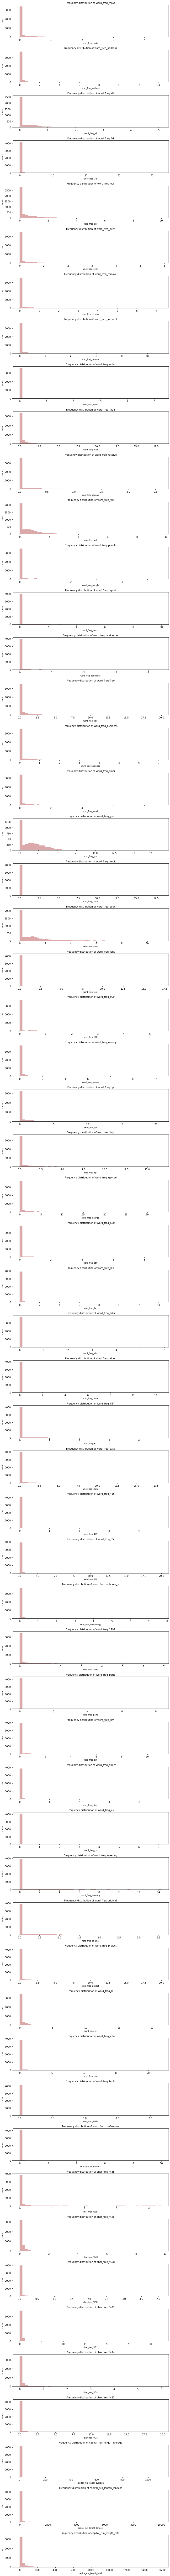

In [20]:
# Plotting distribution of numerical variables
col_names = num_columns
fig, ax = plt.subplots(len(col_names), figsize=(10,150))

for i, col_val in enumerate(col_names):

    sns.distplot(s_df[col_val], hist=True, ax=ax[i], kde = False, color = 'brown')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

> Numerical Variables Summaries
Most variables are left skewwed



### Analysis of Categorical Variables

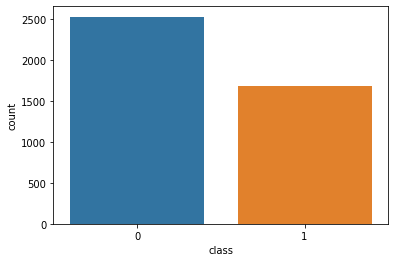

In [21]:
# Bar charts of categorical columns according to the class variable
#
sns.countplot(x='class',data=s_df)

> Analysis of the categorical variables
* class: Most entries are not spam


#Chapter Seven: Bivariate Analysis

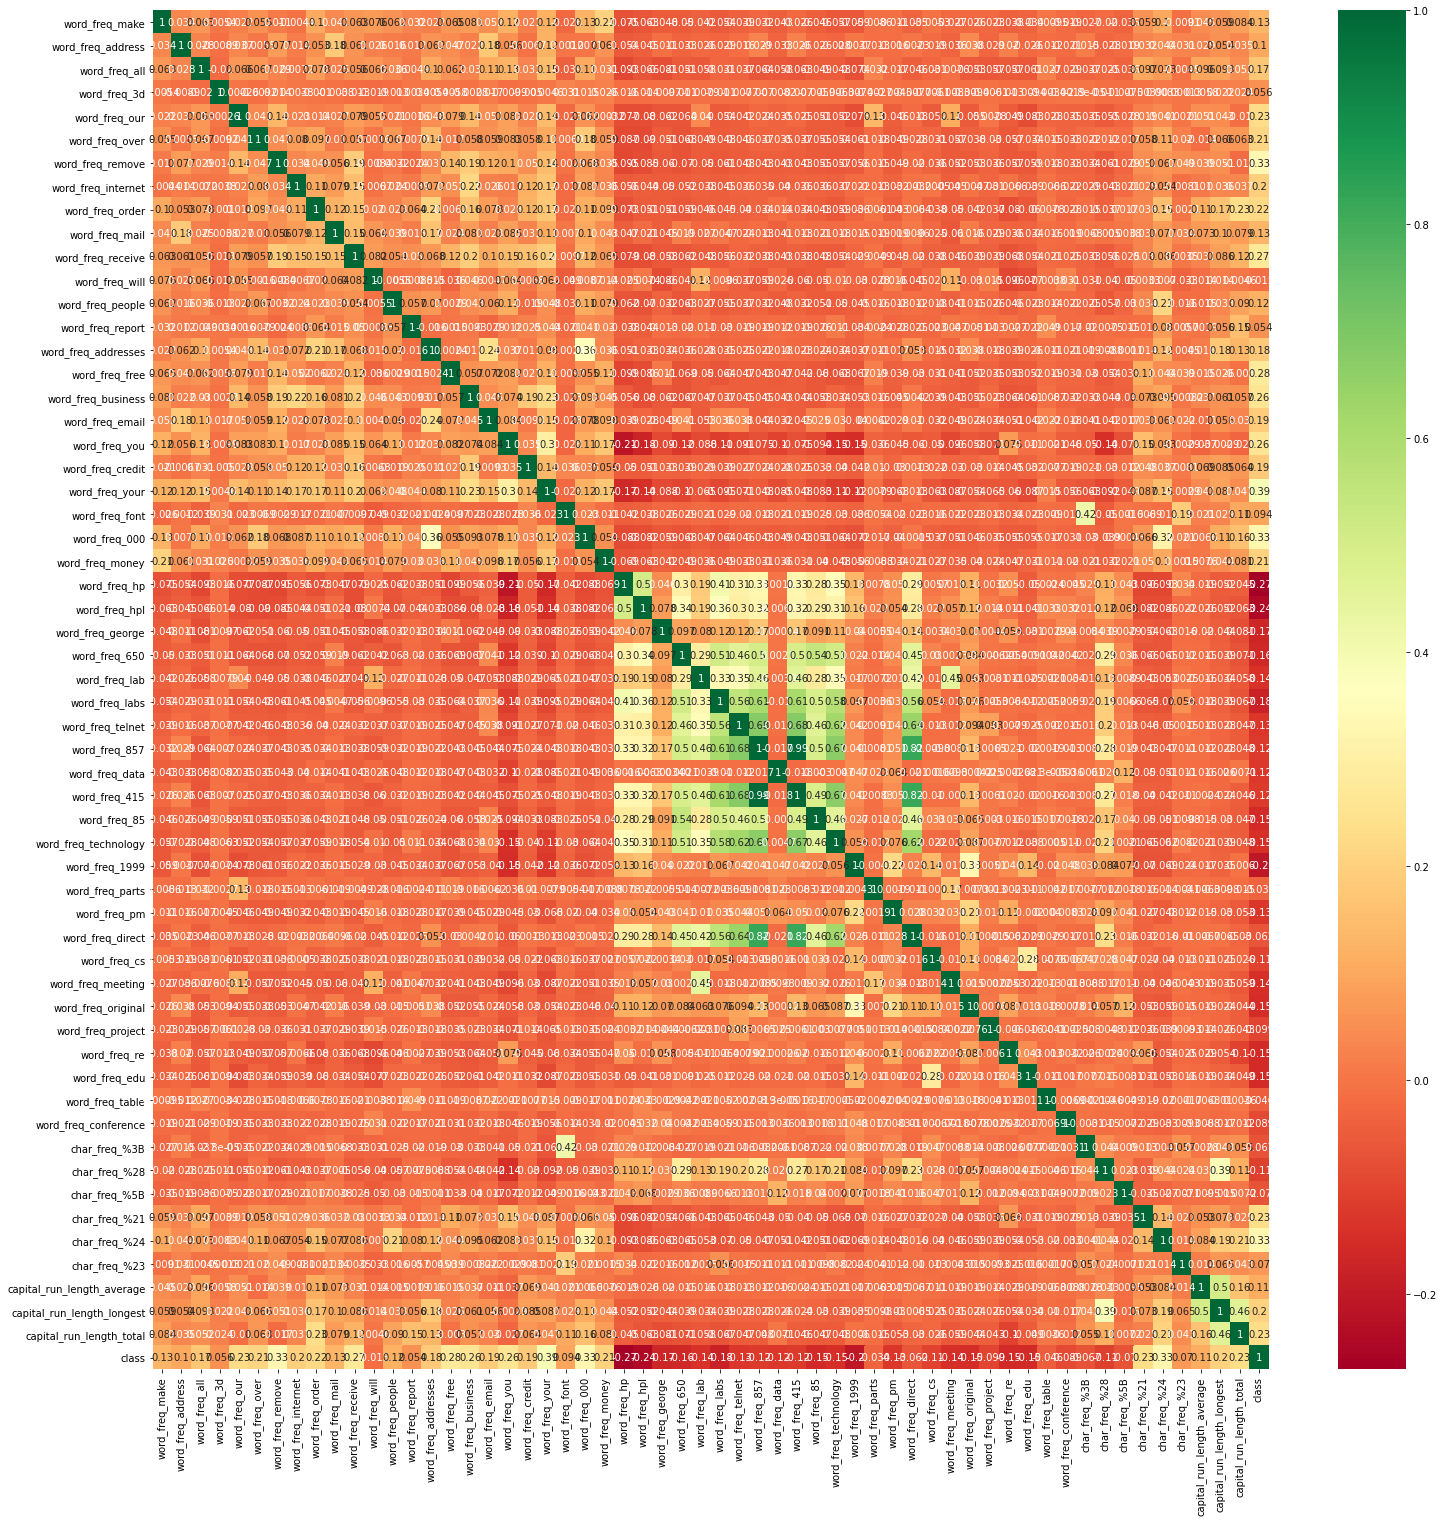

In [70]:
plt.figure(figsize=(25,25))
sns.heatmap(s_df.corr(),annot=True,cmap='RdYlGn')

#Chapter Eight: Modelling

### Baseline Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# Selecting the independent variables and the target variable
#
X = s_df.drop('class', axis = 1)
y = s_df['class']

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
# Using our model to make a prediction
y_pred_log = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print('\n')

#Checking the errors of our model using the metrics module
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision score:",metrics.precision_score(y_test, y_pred_log))
print("Recall score:",metrics.recall_score(y_test, y_pred_log))
print('\n')
#
print(f'{classification_report(y_test, y_pred_log)}')


[[458  37]
 [ 31 316]]


Accuracy score: 0.9192399049881235
Precision score: 0.8951841359773371
Recall score: 0.9106628242074928


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       495
           1       0.90      0.91      0.90       347

    accuracy                           0.92       842
   macro avg       0.92      0.92      0.92       842
weighted avg       0.92      0.92      0.92       842



Logistic Regression:

Our model has a classification rate of 91% which is an okay baseline model. 

For the precision.In prediction case, when the logistic regression model predicts a survivor. It predicts an email is not a spam 94% of the time. It predicts of a spam 90% of the time.

The recall, the ability for the model to identify is not a spam accurately is 93% and ability for the model to identify is a spam accurately 91% .

The F1 score is fairly good with 93% on prediction of not a spam,  and 90% of spam

The confusion matrix. The model predicted 458 and 316 of the records accurately and 31, 37 records were not accurately predicted

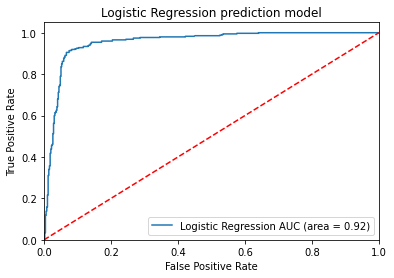

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression prediction model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our ROC area under the curve is 0.92 our model will perform very well

### Feature Selection

In [50]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


  
# Create DataFrame 
df = pd.DataFrame(X.columns, fit.ranking_, columns=['Variables']) 
df


Num Features: 10
Selected Features: [False False False False False False  True False False False False False
 False False False False False False False  True False False  True False
  True False  True False False False False False False False False False
 False False False False  True  True False  True False False False  True
 False False False False  True False False False False]
Feature Ranking: [42 37 36  6 24 17  1 22 12 40  5 35 39 38  7  9  8 47 44  1 32 31  1 23
  1 11  1 29  3 27 34 45 18 41 10 25 26 20 13 33  1  1 14  1 21  2 16  1
 15 28 19 30  1  4 43 46 48]


,Variables
42,word_freq_make
37,word_freq_address
36,word_freq_all
6,word_freq_3d
24,word_freq_our
17,word_freq_over
1,word_freq_remove
22,word_freq_internet
12,word_freq_order
40,word_freq_mail


## Naive Bayes Classifier

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 



### Multinomial Naive Bayes 80-20 (training 80% of the data)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.

In [57]:
#Assining test variable x and y
x = s_df[['word_freq_remove', 'word_freq_credit', 'word_freq_000', 'word_freq_hp', 
          'word_freq_george', 'word_freq_cs', 'word_freq_meeting', 'word_freq_project', 'word_freq_conference', 'char_freq_%24']]
Y = s_df['class']

#Splitting our data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20)

#Creating the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

#Training the model
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')


The accuracy score is: 0.8705463182897862


              precision    recall  f1-score   support

           0       0.84      0.97      0.90       518
           1       0.95      0.70      0.81       324

    accuracy                           0.87       842
   macro avg       0.89      0.84      0.85       842
weighted avg       0.88      0.87      0.87       842



Multinomial Naive Bayes 80% of training data:

Our model has a classification rate of 87% which is an okay baseline model. 

For the precision.In prediction case, when the naive bayes model predicts a survivor. It predicts an email is not a spam 84% of the time. It predicts of a spam 95% of the time.

The recall, the ability for the model to identify is not a spam accurately is 97% and ability for the model to identify is a spam accurately 70% .

The F1 score is fairly good with 90% on prediction of not a spam,  and 81% of spam


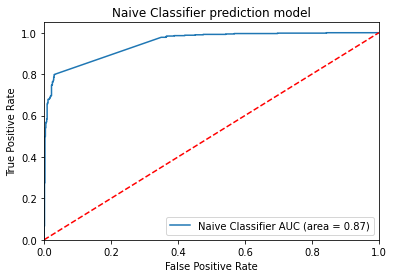

In [66]:
#Displaying the prediction performance
Naive_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Naive Classifier AUC (area = %0.2f)' % Naive_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

The model has an AUC is 0.84 which shows that it will do a good job with predicting.

### Multinomial Naive Bayes 70-30 (training 70% of the data)

In [64]:
#Splitting our data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30)

#Creating the model
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
multi.fit(X_train,y_train)

#Training the model
y_pred = multi.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

The accuracy score is: 0.8915281076801267


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       766
           1       0.95      0.77      0.85       497

    accuracy                           0.89      1263
   macro avg       0.91      0.87      0.88      1263
weighted avg       0.90      0.89      0.89      1263



Multinomial Naive Bayes 70% of training data:

Our model has a classification rate of 89% which is an okay baseline model. 

For the precision.In prediction case, when the naive bayes model predicts a survivor. It predicts an email is not a spam 87% of the time. It predicts of a spam 95% of the time.

The recall, the ability for the model to identify is not a spam accurately is 97% and ability for the model to identify is a spam accurately 77% .

The F1 score is fairly good with 92% on prediction of not a spam,  and 85% of spam

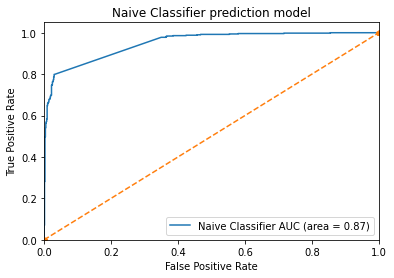

In [65]:
#Displaying the prediction performance
Naive_roc_auc = roc_auc_score(y_test, multi.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, multi.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Naive Classifier AUC (area = %0.2f)' % Naive_roc_auc)
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

The model has an AUC is 0.87 which shows that it will do a good job with predicting.

### Multinomial Naive Bayes 60-40 (training 60% of the data)

In [68]:
#Splitting our data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.40)

#Creating the model
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,y_train)

#Training the model
y_pred = mn.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

The accuracy score is: 0.8747030878859857


              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1009
           1       0.94      0.73      0.82       675

    accuracy                           0.87      1684
   macro avg       0.89      0.85      0.86      1684
weighted avg       0.88      0.87      0.87      1684



Multinomial Naive Bayes 80% of training data:

Our model has a classification rate of 87% which is an okay baseline model. 

For the precision.In prediction case, when the naive bayes model predicts a survivor. It predicts an email is not a spam 85% of the time. It predicts of a spam 94% of the time.

The recall, the ability for the model to identify is not a spam accurately is 97% and ability for the model to identify is a spam accurately 73% .

The F1 score is fairly good with 90% on prediction of not a spam,  and 82% of spam

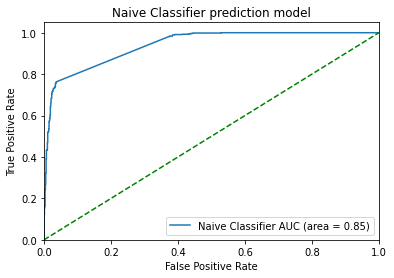

In [69]:
#Displaying the prediction performance
Naive_roc_auc = roc_auc_score(y_test, mn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Naive Classifier AUC (area = %0.2f)' % Naive_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Classifier prediction model')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

The model has an AUC is 0.85 which shows that it will do a good job with predicting.

# Chapter Nine:Conclusion

From our success criteria above
> The successful model should have:
* accuracy score equal to or above 80%
* Recall of 80% and above
* Precision of 80% and above
* F1 score of 80% and above
* AUC curve of 75% and above


model type | Accuracy Score | Recall(0,1)| Precision(0,1) | F1 (0,1) | AUC curve
-----------|----------------|------------|----------------|----------|--------
Logistic Regression | 0.91| 0.94, 0.90| 0.93, 0.91 | 0.93, 0.90 | 0.92
Multinomial Naive Bayes(80%) | 0.87 | 0.84, 0.95 | 0.97, 0.70|0.90, 0.81| 0.87
Multinomial Naive Bayes(70%)| 0.89| 0.87, 0.95| 0.97, 0.77| 0.92, 0.85| 0.87
Multinomial Naive Bayes(60%)|0.87 | 0.85, 0.94| 0.97, 0.73| 0.90, 0.82| 0.85




All the models met the success criteria.
We can improve the model by applying laplace smoothing on multinomial naive Bayes.
For the logistic regression can be improved by cross validation.